## Downloading Wico Dataset Uploaded On Kaggle

In [ ]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d manaspp/wico-graph
! unzip wico-graph

# Dataset

Wico Graph Dataset : https://datasets.simula.no/wico-graph/
<br/>DOI : 10.1145/3472720.3483617<br/>
<br />
In the wake of the COVID-19 pandemic, a surge of misinformation has flooded social media and other internet channels, and some of it has the potential to cause real-world harm. To counteract this misinformation, reliably identifying it is a principal problem to be solved.
 `However, the identification of misinformation poses a formidable challenge for language processing systems since the texts containing misinformation are short, work with insinuation rather than explicitly stating a false claim, or resemble other postings that deal with the same topic ironically.` 
 Accordingly, for the development of better detection systems, it is not only essential to use hand-labeled ground truth data and extend the analysis with methods beyond Natural Language Processing to consider the characteristics of the participant's relationships and the diffusion of misinformation. 

---

## Importing Necessary Libraries

In [ ]:
import random
import networkx as nx
import pandas as pd
import os
import statistics
import matplotlib.pyplot as plt
import numpy as np

def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r


## Extracting the graphs

The novel dataset deals with a specific piece of misinformation: the idea that the 5G wireless network is causally connected to the COVID-19 pandemic. The authors extracted the subgraphs of 3,000 manually classified Tweets from Twitter's follower network and distinguished them into three categories. `First, subgraphs of Tweets that propagate the specific 5G misinformation, those that spread other conspiracy theories, and Tweets that do neither.` the WICO (Wireless Networks and Coronavirus Conspiracy) dataset supports experts in machine learning, graph processing, and related fields in studying the spread of misinformation.

---

The dataset has been collected from Twitter during a period between 1st of January 2020 and 15th of July 2020, by searching for the 5G and Corona-virus-related keywords (e.g., "5G", "corona", "COVID-19", etc.) inside the tweets' text. All tweets should still be online at the time of releasing the dataset. The dataset consists out of three classes.

### Extracting 5G Conspiracy Graphs

`5G-Corona Conspiracy:` This class contains all tweets that claim or insinuate some deeper connection between COVID-19 and 5G, such as the idea that 5G weakens the immune system and thus caused the current corona-virus pandemic, or that there is no pandemic and the COVID-19 victims were actually harmed by radiation emitted by 5G network towers. The crucial requirement is the claimed existence of some causal link.

In [ ]:
temp = []

for i in range(1,413):
    temp.append(list_files(f'5G_Conspiracy_Graphs/{i}/'))

five_cons = []
for i in range(len(temp)):
  for j in range(len(temp[i])):
    if 'edges' in temp[i][j]:
      break
  f = pd.read_csv(temp[i][j],sep=" ",names=['source','target'])
  g = nx.from_pandas_edgelist(f,source='source', target='target',create_using = nx.DiGraph)
  five_cons.append(g) 

### Extracting Other Conspiracy Graphs

`Other Conspiracy:` This class contains all tweets that spread conspiracy theories other than the ones discussed above. This includes ideas about an intentional release of the virus, forced or harmful vaccinations, or the virus being a hoax.

In [ ]:
temp = []

for i in range(1,598):
    temp.append(list_files(f'Other_Graphs/{i}/'))

other_cons = []
for i in range(len(temp)):
  for j in range(len(temp[i])):
    if 'edges' in temp[i][j]:
      break
  f = pd.read_csv(temp[i][j],sep=" ",names=['source','target'])
  g = nx.from_pandas_edgelist(f,source='source', target='target',create_using = nx.DiGraph)
  other_cons.append(g) 

### Extracting Non-Conspiracy Graphs

`Non-Conspiracy:` This class contains all tweets not belonging to the previous two classes. Note that this also includes tweets that discuss COVID-19 pandemic itself, tweets claim that 5G is not proven to be absolutely safe or even can be harmful without linking it to COVID-19, as well as tweets claiming that authorities are pushing for the installation of 5G while the Publicis distracted by COVID-19. In addition, tweets pointing out the existence of conspiracy theories or mocking them fall into this class since they do not spread the conspiracy theories by inciting people to believe in them.

In [ ]:
temp = []

for i in range(1,2502):
    temp.append(list_files(f'Non_Conspiracy_Graphs/{i}/'))

non_cons = []
for i in range(len(temp)):
  for j in range(len(temp[i])):
    if 'edges' in temp[i][j]:
      break
  f = pd.read_csv(temp[i][j],sep=" ",names=['source','target'])
  g = nx.from_pandas_edgelist(f,source='source', target='target',create_using = nx.DiGraph)
  non_cons.append(g)

# Analysis of Social Network Properties

A sample graph from the dataset.<br />

<img src="http://drive.google.com/uc?export=view&id=1_7cuaGXaJP5jaqOOiW6XqweC8t8ogdEl">

## Nodes

The `number of nodes` in each of the subgraph is calculated.

In [ ]:
five_nodes = []
for i in five_cons:
  five_nodes.append(nx.number_of_nodes(i))

other_nodes = []
for i in other_cons:
  other_nodes.append(nx.number_of_nodes(i))

non_nodes = []
for i in non_cons:
  non_nodes.append(nx.number_of_nodes(i))

print(f"Mean number of nodes in 5G-conspiracy graphs is: {np.mean(five_nodes)}")
print(f"Mean number of nodes in Other-conspiracy graphs is: {np.mean(other_nodes)}")
print(f"Mean number of nodes in Combined-conspiracy graphs is: {(np.mean(other_nodes)*598 + np.mean(five_nodes)*413)/1011}")
print(f"Mean number of nodes in Non-conspiracy graphs is: {np.mean(non_nodes)}")

Mean number of nodes in 5G-conspiracy graphs is: 34.68446601941748
Mean number of nodes in Other-conspiracy graphs is: 51.60134003350084
Mean number of nodes in Other-conspiracy graphs is: 44.69068823546284
Mean number of nodes in Non-conspiracy graphs is: 44.61855257896841


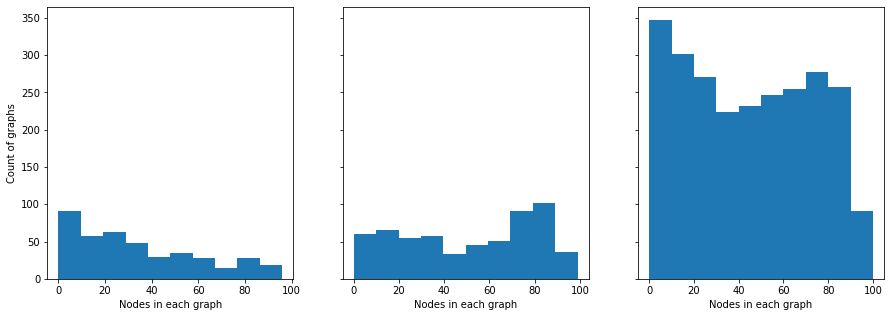

In [ ]:
fig,ax = plt.subplots(1,3,sharey = True,figsize = (15,5))
ax[0].hist(five_nodes)
ax[0].set_xlabel("Nodes in each graph")
ax[0].set_ylabel("Count of graphs")
ax[1].hist(other_nodes)
ax[1].set_xlabel("Nodes in each graph")
ax[2].hist(non_nodes)
ax[2].set_xlabel("Nodes in each graph")
plt.show()

### `Observations: `

- While the average of nodes in each of the two conspiracy classes differed from the non-conspiracy class, their combined average was very similar to that of the non-conspiracy class.
- While, an ML model might find this feature useful in classifying the conspiracy classes individually against non-conspiracy, it may not be a useful feature when we combine the data of the two classes.
- `It indicates that both rumors and non-rumors may spread to similar number of nodes in the dataset and hence, we will have to look for more complex features to determine the difference between the spread of the two.`

## Edges

The `number of edges` in each subgraph is calculated.

In [ ]:
five_edge = []
for i in five_cons:
  five_edge.append(nx.number_of_edges(i))

other_edge = []
for i in other_cons:
  other_edge.append(nx.number_of_edges(i))

non_edge = []
for i in non_cons:
  non_edge.append(nx.number_of_edges(i))

print(f"Mean number of edges in 5G-conspiracy graphs is: {np.mean(five_edge)}")
print(f"Mean number of edges in Other-conspiracy graphs is: {np.mean(other_edge)}")
print(f"Mean number of edges in Combined-conspiracy graphs is: {np.mean(five_edge + other_edge)}")
print(f"Mean number of edges in Non-conspiracy graphs is: {np.mean(non_edge)}")

Mean number of edges in 5G-conspiracy graphs is: 142.3131067961165
Mean number of edges in Other-conspiracy graphs is: 197.55778894472363
Mean number of edges in Other-conspiracy graphs is: 175.0
Mean number of edges in Non-conspiracy graphs is: 131.65573770491804


### `Observations:`

- The average number of edges is different for each of the classes.
- It is also different in the case of the two conspiracy classes combined and the non-conspiracy graph.
- `As we see, the non-rumors had a lower number of edges on average. This could be an indication towards a more triggered activity period in the network when there is a rumor when compared to a non-rumor. However, this could be dependent on the nature of non-rumors, for example, a celebratory news receives much better interaction when compared to a regular information update. However, rumors seem to generate more activity as both the classes in the database had more edges on average compared to non-rumor class.`

## Degree

We calculate the `mean of degrees of nodes` in each sub graph.

In [ ]:
five_cons_deg = []
for i in range(len(five_cons)):
  g = five_cons[i]
  try:
    five_cons_deg.append(nx.degree_histogram(g))
  except:
    pass

other_cons_deg = []
for i in range(len(other_cons)):
  g = other_cons[i]
  try:
    other_cons_deg.append(nx.degree_histogram(g))
  except:
    pass

non_cons_deg = []
for i in range(len(non_cons)):
  g = non_cons[i]
  try:
    non_cons_deg.append(nx.degree_histogram(g))
  except:
    pass

In [ ]:
mean_deg_five = []
var_deg_five = []
med_deg_five = []
for i in five_cons_deg:
  mean_deg_five.append(np.mean(i))
  var_deg_five.append(np.var(i))
  med_deg_five.append(np.median(i))

mean_deg_other = []
var_deg_other = []
med_deg_other = []
for i in other_cons_deg:
  mean_deg_other.append(np.mean(i))
  var_deg_other.append(np.var(i))
  med_deg_other.append(np.median(i))

mean_deg_non = []
var_deg_non = []
med_deg_non = []
for i in non_cons_deg:
  mean_deg_non.append(np.mean(i))
  var_deg_non.append(np.var(i))
  med_deg_non.append(np.median(i))

In [ ]:
print(f"Mean of average degree of graphs in 5G conspiracy : {np.nanmean(mean_deg_five)}")
print(f"Mean of average degree of graphs in Other conspiracy :{np.nanmean(mean_deg_other)}")
print(f"Mean of average degree of graphs in Combined conspiracy :{np.nanmean(mean_deg_five + mean_deg_other)}")
print(f"Mean of average degree of graphs in Non conspiracy :{np.nanmean(mean_deg_non)}")

Mean of average degree of graphs in 5G conspiracy : 1.1621028540383977
Mean of average degree of graphs in Other conspiracy :1.1319829464453022
Mean of average degree of graphs in Combined conspiracy :1.144187220380229
Mean of average degree of graphs in Non conspiracy :1.2247871479838943


### `Observations:`

- The average of mean degree of graphs is different for each of the classes.
- It is also different in the case of the two conspiracy classes combined and the non-conspiracy graph.
- `The values are very close but still differs between the classes. Also, both rumor classes had lower values when compared to the non-rumor class, however, because of the closeness of the values we cannot infer a solid conclusion here.`

## Degree Centrality

We calculate the `mean of degree centralities of nodes` in the subgraph.

In [ ]:
five_deg_cen = []
for i in five_cons:
  five_deg_cen.append(np.mean(list(nx.degree_centrality(i).values())))

other_deg_cen = []
for i in other_cons:
  other_deg_cen.append(np.mean(list(nx.degree_centrality(i).values())))

non_deg_cen = []
for i in non_cons:
  non_deg_cen.append(np.mean(list(nx.degree_centrality(i).values())))

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
print(f"Mean of average degree centralitiy of graphs in 5G conspiracy : {np.nanmean(five_deg_cen)}")
print(f"Mean of average degree centralitiy of graphs in Other conspiracy :{np.nanmean(other_deg_cen)}")
print(f"Mean of average degree centralitiy of graphs in Combined conspiracy :{np.nanmean(other_deg_cen + five_deg_cen)}")
print(f"Mean of average degree centralitiy of graphs in Non conspiracy :{np.nanmean(non_deg_cen)}")

Mean of average degree centralitiy of graphs in 5G conspiracy : 0.2979032316107346
Mean of average degree centralitiy of graphs in Other conspiracy :0.20095286729106024
Mean of average degree centralitiy of graphs in Combined conspiracy :0.2402361486421459
Mean of average degree centralitiy of graphs in Non conspiracy :0.19580519780760516


### `Observations:`

- The mean of degree centrality of nodes of subgraphs have a different average in each of the three classes, however the values are very close between other conspiracy class and non-conspiracy class.
- The values are clearly different for the combined conspiracy classes and non-conspiracy class.
- `

## Closeness Centrality

We calculate the `mean of closeness centralities of nodes` in the subgraph.

In [ ]:
five_close_cen = []
for i in five_cons:
  five_close_cen.append(np.mean(list(nx.closeness_centrality(i).values())))

other_close_cen = []
for i in other_cons:
  other_close_cen.append(np.mean(list(nx.closeness_centrality(i).values())))

non_close_cen = []
for i in non_cons:
  non_close_cen.append(np.mean(list(nx.closeness_centrality(i).values())))

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
print(f"Mean of average closeness centralitiy of graphs in 5G conspiracy : {np.nanmean(five_close_cen)}")
print(f"Mean of average closeness centralitiy of graphs in Other conspiracy :{np.nanmean(other_close_cen)}")
print(f"Mean of average closeness centralitiy of graphs in Combined conspiracy :{np.nanmean(other_close_cen + five_close_cen)}")
print(f"Mean of average closeness centralitiy of graphs in Non conspiracy :{np.nanmean(non_close_cen)}")

Mean of average closeness centralitiy of graphs in 5G conspiracy : 0.28723688061155134
Mean of average closeness centralitiy of graphs in Other conspiracy :0.2524961050262265
Mean of average closeness centralitiy of graphs in Combined conspiracy :0.2665727067104998
Mean of average closeness centralitiy of graphs in Non conspiracy :0.18934942155108458


### `Observations:`

- The mean of closeness centrality of nodes of subgraphs have a different average in each of the three classes, and the values are clearly distinct as well.
- The values are clearly different for the combined conspiracy classes and non-conspiracy class, hence this could be useful feature for our ML models.
- `Closeness centrality is higher for both the rumor classes. This indicates that the rumors are quite likely spreading in closer networks when compared to non-rumors which could be spreading across a larger and more disconnected network.`

### Eigenvector Centrality

We calculate the `mean of eigen vector centralities of nodes` in the subgraph.

In [ ]:
five_eig_cen = []
for i in five_cons:
  try:
    five_eig_cen.append(np.mean(list(nx.eigenvector_centrality(i).values())))
  except:
    pass

other_eig_cen = []
for i in other_cons:
  try:
    other_eig_cen.append(np.mean(list(nx.eigenvector_centrality(i).values())))
  except:
    pass

non_eig_cen = []
for i in non_cons:
  try:
    non_eig_cen.append(np.mean(list(nx.eigenvector_centrality(i).values())))
  except:
    pass

In [ ]:
print(f"Mean of average Eigen vector centralitiy of graphs in 5G conspiracy : {np.nanmean(five_eig_cen)}")
print(f"Mean of average Eigen vector centralitiy of graphs in Other conspiracy :{np.nanmean(other_eig_cen)}")
print(f"Mean of average Eigen vector centralitiy of graphs in Combined conspiracy :{np.nanmean(other_eig_cen + five_eig_cen)}")
print(f"Mean of average Eigen vector centralitiy of graphs in Non conspiracy :{np.nanmean(non_eig_cen)}")

Mean of average Eigen vector centralitiy of graphs in 5G conspiracy : 0.15690464623259126
Mean of average Eigen vector centralitiy of graphs in Other conspiracy :0.114468315525839
Mean of average Eigen vector centralitiy of graphs in Combined conspiracy :0.1314428478085399
Mean of average Eigen vector centralitiy of graphs in Non conspiracy :0.11057136085268626


### `Observations:`

- The mean of Eigen vector centrality of nodes of subgraphs have a different average in each of the three classes, however the values are very close between other conspiracy class and non-conspiracy class.
- The values are clearly different for the combined conspiracy classes and non-conspiracy class.

### Core Number

We calculate the `mean of core number of nodes` in the subgraph.

In [ ]:
five_core = []
for i in five_cons:
  try:
    five_core.append(np.mean(list(nx.core_number(i).values())))
  except:
    pass

other_core = []
for i in other_cons:
  try:
    other_core.append(np.mean(list(nx.core_number(i).values())))
  except:
    pass

non_core = []
for i in non_cons:
  try:
    non_core.append(np.mean(list(nx.core_number(i).values())))
  except:
    pass

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
print(f"Mean of average of core numbers of nodes of graphs in 5G conspiracy : {np.nanmean(five_core)}")
print(f"Mean of average of core numbers of nodes of graphs in Other conspiracy :{np.nanmean(other_core)}")
print(f"Mean of average of core numbers of nodes of graphs in Combined conspiracy :{np.nanmean(other_core + five_core)}")
print(f"Mean of average of core numbers of nodes of graphs in Non conspiracy :{np.nanmean(non_core)}")

Mean of average of core numbers of nodes of graphs in 5G conspiracy : 3.8884887011597087
Mean of average of core numbers of nodes of graphs in Other conspiracy :3.9069439802808668
Mean of average of core numbers of nodes of graphs in Combined conspiracy :3.8994660927327724
Mean of average of core numbers of nodes of graphs in Non conspiracy :3.0000113212036643


### `Observations:`

- The mean of core number of nodes of subgraphs have a different average in each of the three classes, and the values are clearly distinct as well.
- The values are clearly different for the combined conspiracy classes and non-conspiracy class, hence this could be useful feature for our ML models.
- `This observation is similar to the observation made in closeness centrality. Nodes involved in rumors seem to be a part of larger k-core groups when compared to nodes in the non-rumor spreads.`

### Average Clustering Coefficient

We calculate the `mean of clustering coefficients of nodes` in the subgraph.

In [ ]:
five_avg_cc = []
for i in five_cons:
  try:
    five_avg_cc.append(nx.average_clustering(i))
  except:
    pass

other_avg_cc = []
for i in other_cons:
  try:
    other_avg_cc.append(nx.average_clustering(i))
  except:
    pass

non_avg_cc = []
for i in non_cons:
  try:
    non_avg_cc.append(nx.average_clustering(i))
  except:
    pass

In [ ]:
print(f"Mean of average of clustering coefficients of nodes of graphs in 5G conspiracy : {np.nanmean(five_avg_cc)}")
print(f"Mean of average of clustering coefficients of nodes of graphs in Other conspiracy :{np.nanmean(other_avg_cc)}")
print(f"Mean of average of clustering coefficients of nodes of graphs in Combined conspiracy :{np.nanmean(other_avg_cc + five_avg_cc)}")
print(f"Mean of average of clustering coefficients of nodes of graphs in Non conspiracy :{np.nanmean(non_avg_cc)}")

Mean of average of clustering coefficients of nodes of graphs in 5G conspiracy : 0.23089735490466967
Mean of average of clustering coefficients of nodes of graphs in Other conspiracy :0.2417586366587332
Mean of average of clustering coefficients of nodes of graphs in Combined conspiracy :0.23735775802385317
Mean of average of clustering coefficients of nodes of graphs in Non conspiracy :0.19280878983377167


### `Observations:`

- The mean of clustering coefficients of nodes of subgraphs have a different average in each of the three classes, and the values are clearly distinct as well.
- The values are clearly different for the combined conspiracy classes and non-conspiracy class, hence this could be useful feature for our ML models.
- `Higher clustering coefficient in rumor spreading graphs indicates that the nodes involved in rumors form denser clusters when compared to non-rumor spreading nodes.`

### Connectedness Using Transitivity

In [ ]:
five_trans = []
for i in five_cons:
  try:
    five_trans.append(nx.transitivity(i))
  except:
    pass

other_trans = []
for i in other_cons:
  try:
    other_trans.append(nx.transitivity(i))
  except:
    pass

non_trans = []
for i in non_cons:
  try:
    non_trans.append(nx.transitivity(i))
  except:
    pass

In [ ]:
print(f"Mean of transitivity of nodes of graphs in 5G conspiracy : {np.nanmean(five_trans)}")
print(f"Mean of transitivity of nodes of graphs in Other conspiracy :{np.nanmean(other_trans)}")
print(f"Mean of transitivity of nodes of graphs in Combined conspiracy :{np.nanmean(other_trans + five_trans)}")
print(f"Mean of transitivity of nodes of graphs in Non conspiracy :{np.nanmean(non_trans)}")

Mean of transitivity of nodes of graphs in 5G conspiracy : 0.23298168794683694
Mean of transitivity of nodes of graphs in Other conspiracy :0.24623098143597807
Mean of transitivity of nodes of graphs in Combined conspiracy :0.240820962687191
Mean of transitivity of nodes of graphs in Non conspiracy :0.2715126818270199


### `Observations:`

- The transitivity of subgraphs have a different average in each of the three classes, and the values are clearly distinct as well.
- The values are clearly different for the combined conspiracy classes and non-conspiracy class, hence this could be useful feature for our ML models.
- `Higher Transitivity in non-rumor graph indicates the presence of more triangles in the graph, when compared to the rumor spreading graph.` 

In [ ]:
five_sq = []
for i in five_cons:
  try:
    five_sq.append(np.mean(list(nx.square_clustering(i).values())))
  except:
    pass

other_sq = []
for i in other_cons:
  try:
    other_sq.append(np.mean(list(nx.square_clustering(i).values())))
  except:
    pass

non_sq = []
for i in non_cons:
  try:
    non_sq.append(np.mean(list(nx.square_clustering(i).values())))
  except:
    pass

print(f"Means: {np.nanmean(five_sq),np.nanmean(other_sq),np.nanmean(non_sq)}")

Means: (0.09186322419538209, 0.09062204233520291, 0.08492478605190319)


### Radius

In [ ]:
five_rad = []
for i in five_cons:
  try:
    five_rad.append(nx.radius(i))
  except:
    pass

other_rad = []
for i in other_cons:
  try:
    other_rad.append(nx.radius(i))
  except:
    pass

non_rad = []
for i in non_cons:
  try:
    non_rad.append(nx.radius(i))
  except:
    pass

Medians : (1.0, 2.0, 2.0)
Means: (1.564102564102564, 1.8275862068965518, 1.5656565656565657)


### Diameter

In [ ]:
five_dia = []
for i in five_cons:
  try:
    five_dia.append(nx.diameter(i))
  except:
    pass

other_dia = []
for i in other_cons:
  try:
    other_dia.append(nx.diameter(i))
  except:
    pass

non_dia = []
for i in non_cons:
  try:
    non_dia.append(nx.diameter(i))
  except:
    pass

print(f"Medians : {np.median(five_dia),np.median(other_dia),np.median(non_dia)}")
print(f"Means: {np.mean(five_dia),np.mean(other_dia),np.mean(non_dia)}")

Medians : (2.0, 3.0, 3.0)
Means: (2.641025641025641, 3.310344827586207, 2.797979797979798)
